In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL

In [2]:
img = cv2.imread('mosaico.tif')

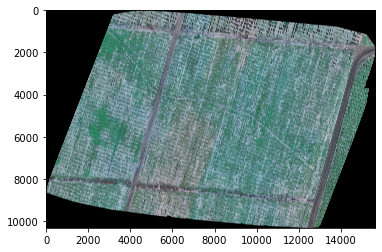

In [3]:
plt.imshow(img)

In [4]:
grasHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
light_green = (70,35,35)
dark_green = (91, 255,255)
mask = cv2.inRange(grasHSV, light_green, dark_green)
result = cv2.bitwise_and(img, img, mask=mask)

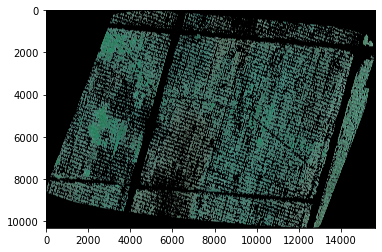

In [7]:
plt.imshow(result)

In [5]:
cv2.imwrite('mosaico.png', img)

True

In [8]:
#cv2.imwrite('mosaico.png', img)

True

In [10]:
import image_slicer

In [11]:
PIL.warnings.simplefilter('ignore', PIL.Image.DecompressionBombWarning)

In [12]:
image_slicer.slice('mosaico.png', 16)

(<Tile #1 - mosaico_01_01.png>,
 <Tile #2 - mosaico_01_02.png>,
 <Tile #3 - mosaico_01_03.png>,
 <Tile #4 - mosaico_01_04.png>,
 <Tile #5 - mosaico_02_01.png>,
 <Tile #6 - mosaico_02_02.png>,
 <Tile #7 - mosaico_02_03.png>,
 <Tile #8 - mosaico_02_04.png>,
 <Tile #9 - mosaico_03_01.png>,
 <Tile #10 - mosaico_03_02.png>,
 <Tile #11 - mosaico_03_03.png>,
 <Tile #12 - mosaico_03_04.png>,
 <Tile #13 - mosaico_04_01.png>,
 <Tile #14 - mosaico_04_02.png>,
 <Tile #15 - mosaico_04_03.png>,
 <Tile #16 - mosaico_04_04.png>)

In [30]:
img_3_3 = cv2.imread('mosaico_03_03.png')

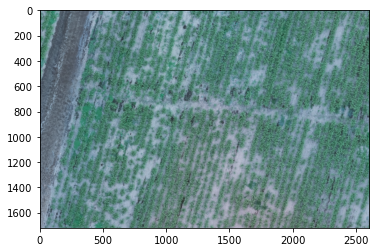

In [31]:
plt.imshow(img_3_3)

In [444]:
img_3_3.shape[0]

1720

In [1]:
max_iterations_x = img_3_3.shape[0]//45
max_iterations_y = img_3_3.shape[1]//45

pixel_iterations_x = list()
pixel_iterations_y = list()
image_crops = list()
image_crops_coord = list()
red = [0,0,255]


for i in range(max_iterations_x):
    pixel_iterations_x.append([i*45, (i+1)*45])
    
for i in range(max_iterations_y):
    pixel_iterations_y.append([i*45, (i+1)*45])



for i in range(len(pixel_iterations_y)):
    for j in range(len(pixel_iterations_x)):
        image_crops_coord.append([[pixel_iterations_x[j][0],pixel_iterations_x[j][1]],[pixel_iterations_y[i][0],pixel_iterations_y[i][1]]])
        image_crops.append(img_3_3[pixel_iterations_x[j][0]:pixel_iterations_x[j][1],pixel_iterations_y[i][0]:pixel_iterations_y[i][1],:])
            
for i in range(0,len(image_crops)):
    img_test_grey = cv2.cvtColor(image_crops[i], cv2.COLOR_BGR2GRAY)
    centroid = np.round(ndimage.measurements.center_of_mass(img_test_grey))    
    try:
        if not np.all(image_crops[i][int(centroid[0]),int(centroid[1])] == 0):
            image_crops[i][int(centroid[0]),int(centroid[1])] = red
        else:
            continue
    except:
        continue

image_container = np.zeros_like(img_3_3)

for i in range(len(image_crops)):
    image_container[image_crops_coord[i][0][0]:image_crops_coord[i][0][1], image_crops_coord[i][1][0]:image_crops_coord[i][1][1], :] = image_crops[i]

    

NameError: name 'img_3_3' is not defined

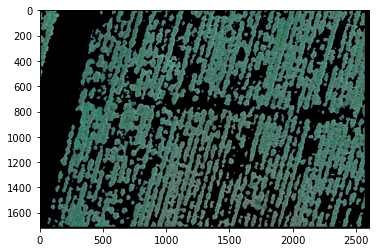

In [451]:
plt.imshow(image_container)

In [452]:
cv2.imwrite('test.png',image_container)

True

In [252]:
from scipy import ndimage

In [253]:
centroid = np.round(ndimage.measurements.center_of_mass(img_test_grey))

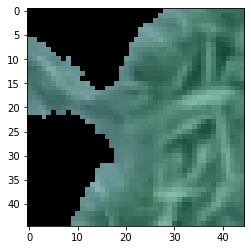

In [254]:
plt.imshow(img_test)

In [17]:
# Create a named colour
red = [255,0,0]

# Change one pixel
img_test[int(centroid[0]),int(centroid[1])] = red

NameError: name 'img_test' is not defined

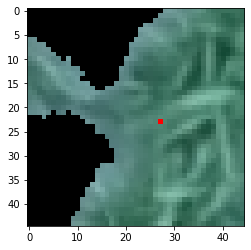

In [19]:
bugan_1 = cv2.imread('imagenes/bugan_1.tif')

In [18]:
bugan_1

TypeError: Image data of dtype object cannot be converted to float

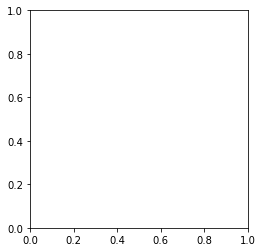

In [13]:
plt.imshow(bugan_1)

In [21]:
!pip install scikit-image

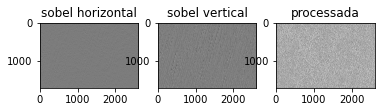

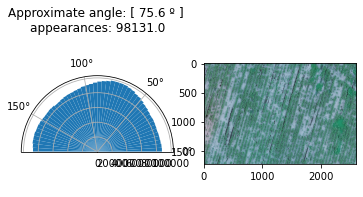

In [6]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

img = cv2.imread("mosaico_04_04.png") #load image
gray = rgb2gray(img)
#filtros sobel
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


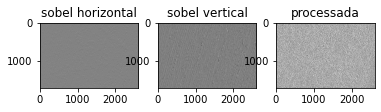

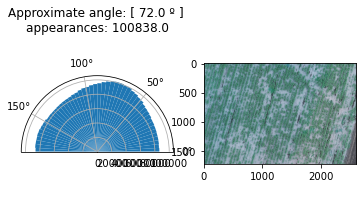

In [7]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

img = cv2.imread("mosaico_05_05.png") #load image
gray = rgb2gray(img)
#filtros sobel
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


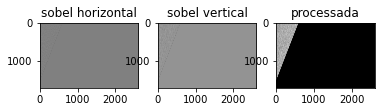

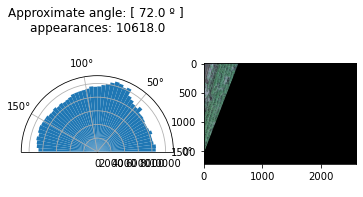

In [8]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

img = cv2.imread("mosaico_06_06.png") #load image
gray = rgb2gray(img)
#filtros sobel
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


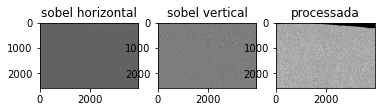

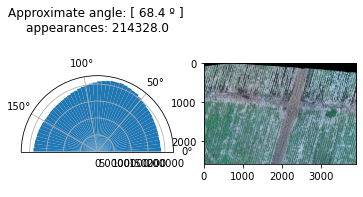

In [14]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

img = cv2.imread("mosaico_01_02.png") #load image
gray = rgb2gray(img)
#filtros sobel
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()


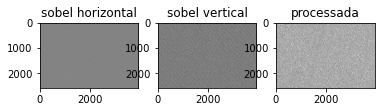

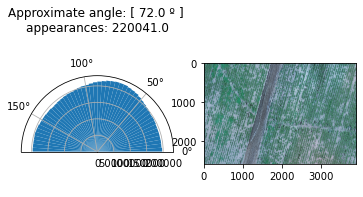

In [15]:
import cv2 #to load image
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

#variaveis
amostra = 50; #quantidade de amostra no histograma, (melhor resultado quando proximo de 50)
#a imagem a ser analisada

img = cv2.imread("mosaico_02_02.png") #load image
gray = rgb2gray(img)
#filtros sobel
sobel_horizontal = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])

sobel_vertical = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]])
#convolução dos filtros com a imagem em preto e branco
imgH = ndimage.convolve(gray, sobel_horizontal)
imgV = ndimage.convolve(gray, sobel_vertical)
plt.subplot(131)
plt.title("sobel horizontal")
plt.imshow(imgH, cmap='gray')
plt.subplot(132)
plt.title("sobel vertical")
plt.imshow(imgV, cmap='gray')

# imgA terá os gradientes das diferencias (sobel) verticais e horzontais
#imgA = imgH*imgV
imgA = np.zeros(imgH.shape)
imgA = imgA + 2
for i in range(imgH.shape[0]):
    for j in range(imgH.shape[1]):
        try: #try evita problemas quando posições inexistentes são acessadas
            #pega os 8 pexel ao redor para melhor distribuição diferencias. calculo da media entre eles
            HtoMean = (imgH[i-1,j-1], imgH[i-1,j], imgH[i-1,j+1], imgH[i,j-1],
             imgH[i,j+1], imgH[i+1,j-1], imgH[i+1,j], imgH[i+1,j+1], imgH[i,j]*2, 0)

            VtoMean = (imgV[i-1,j-1], imgV[i-1,j], imgV[i-1,j+1], imgV[i,j-1],
             imgV[i,j+1], imgV[i+1,j-1], imgV[i+1,j], imgV[i+1,j+1], imgV[i,j]*2, 0)
            HtoMean = np.mean(HtoMean)
            VtoMean = np.mean(VtoMean)
            if VtoMean != 0: # para que não haja divisão por zero
                imgA[i,j] = ((np.arctan(HtoMean/VtoMean))*2)/np.pi
        except IndexError as e:
            pass # resposta para posições inexistentes

imgA = ((imgA*(-1) + 1)/2)*np.pi #ajuste de (-1 á 1) para (0 á pi) para calcular angulo
plt.subplot(133)
plt.title("processada")
plt.imshow(imgA, cmap='gray')
plt.show()

imgAd = imgA.ravel() #transforma a matriz em um vetor linear

fig = plt.figure()
ax = fig.add_subplot(121, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
a,_,_ = plt.hist(imgAd, amostra,range=(0,np.pi)) #histograma do vetor de angulos, com 50 amostras no intervalo de 0 á pi
plt.title("Approximate angle: [ " + str(round((np.argmax(a)/amostra)*180,1)) + " º ] \nappearances: "+str(a.max()))
# (np.argmax(a)/amostra)*180 obtém a posição (entre as amostras) do angulo com maior frequencia e converte para angulos de 0 á 180 º
ax = fig.add_subplot(122, polar=False)
plt.imshow(img)

plt.show()
